In [1]:
base = '/home3/ebrahim/what-is-brainscore/'
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
base = '/home3/ebrahim/what-is-brainscore/'
from matplotlib import pyplot as plt
import os
from sklearn.metrics import mean_squared_error
import sys
sys.path.append('/home3/ebrahim/what-is-brainscore/')
from helper_funcs import find_best_layer
from plotting_functions import plot_across_subjects, plot_test_perf_across_layers, save_fMRI_simple, pass_info_plot_hist2d, find_rows_without_nan
from trained_results_funcs import create_pd_selected_models, find_best, max_across_selected_models
from trained_untrained_results_funcs import max_across_nested
from scipy.stats import pearsonr
import seaborn as sns
import pandas as pd

import matplotlib
from scipy.stats import ttest_rel, ttest_1samp
import nibabel as nib
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
import plotly

In [4]:
# define folderpaths, and load neural data
base = '/home3/ebrahim/what-is-brainscore/'

resultsFolder = f'{base}results_all/results_pereira/'
nc_file_pereira = '/home3/ebrahim/what-is-brainscore/pereira_data/no_share/Pereira_data.nc'
nii_file_path_base = "/home3/ebrahim/neural-nlp-exact/neural_nlp/analyze/surface_projection/"
data_processed_folder = f'{base}data_processed/pereira/'

In [5]:
# load information regarding number of voxels, subjects, and functional network localization for each experiment into a dictionary
exp = ['both', '243', '384']
br_labels_dict = {}
num_vox_dict = {}
ytest_dict = {}
mse_intercept_dict = {}
subjects_dict = {}
for e in exp:
    bre = np.load(f'{base}/pereira_data/networks_{e}.npy', allow_pickle=True)
    br_labels_dict[e] = bre
    num_vox_dict[e] = bre.shape[0]
    mse_intercept_dict[e] = np.load(f'/home3/ebrahim/what-is-brainscore/results_all/results_pereira/mse_intercept_{e}.npy')
    ytest_dict[e] = np.load(f'/home3/ebrahim/what-is-brainscore/results_all/results_pereira/y_test_ordered_{e}.npy')
    subjects_dict[e] = np.load(f"{data_processed_folder}/subjects_{e}.npy", allow_pickle=True)

In [8]:
model_name = 'gpt2-xl' # GPT2-XL or ROB
model_name_upper = model_name.upper()
glove_version = True
deref_version = False

figurePath = '/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/figures/pereira_trained_obi/'
if model_name == 'ROB':
    figurePath = f"{figurePath}rob_obi/"

if model_name == 'gpt2-xl' and glove_version:
    if deref_version:
        figurePath = f"{figurePath}glove/"
    else:
        figurePath = f"{figurePath}glove-noderef/"

print(figurePath)

/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/figures/pereira_trained_obi/glove-noderef/


## Across layer performances

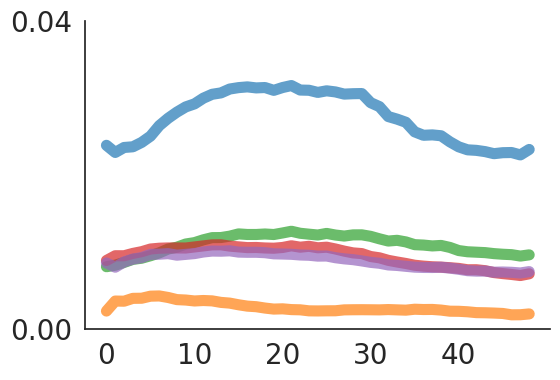

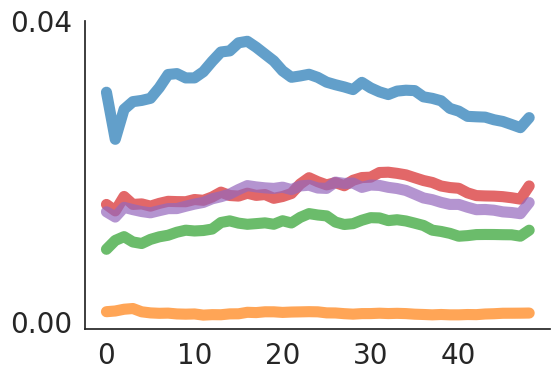

In [63]:
if model_name == 'gpt2-xl':
    model_name_across_layer = 'gpt2-xl-sp'
    num_layers = 48
if model_name == 'ROB':
    model_name_across_layer = 'roberta-large-sp'
    num_layers = 24

N = 1
yticks=[]
networks = ['language', 'DMN', 'MD', 'visual', 'auditory']
model_names = [model_name_across_layer for i in range(N)]
layers_range = [[0,num_layers] for i in range(N)]
layer_name_arr = [f'layer_' for i in range(0,num_layers)]
model_nums = [None]
colors = []
colors = {}
colors_arr = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
for i, n in enumerate(networks):
    colors[n] = colors_arr[i]
    
res_pd_384 = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                             layer_name_arr=layer_name_arr, saveName=f'{model_name}_perf_across_layers_384', 
                             figurePath=figurePath, resultsFolder=resultsFolder, yticks=[0, 0.04], exp='384', 
                             model_nums=model_nums,
                             networks=networks, br_labels=br_labels_dict['384'], 
                             subjects=subjects_dict['384'], colors=colors, plot_legend=False, gpt_sp_perf=None, num_layers=num_layers, ylabel=False, xlabel=False)

res_pd_243 = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                             layer_name_arr=layer_name_arr, saveName=f'{model_name}_perf_across_layers_243', 
                             figurePath=figurePath, resultsFolder=resultsFolder, yticks=[0, 0.04], exp='243', 
                             model_nums=model_nums, ylabel=False, xlabel=False, 
                             networks=networks, br_labels=br_labels_dict['243'], 
                             subjects=subjects_dict['243'], colors=colors, plot_legend=False, gpt_sp_perf=None, num_layers=num_layers)

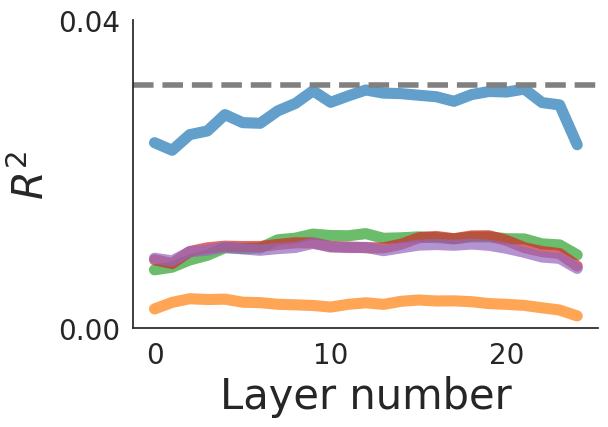

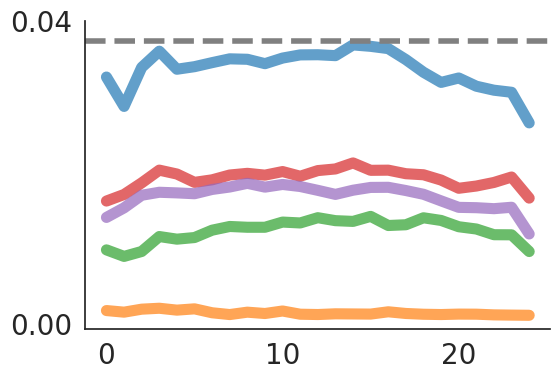

In [64]:
gpt2_sp_384_max = np.max(res_pd_384.loc[res_pd_384.Network=='language'].r2.values)
gpt2_sp_243_max = np.max(res_pd_243.loc[res_pd_243.Network=='language'].r2.values)

model_name_rob = 'ROB'

model_name_across_layer = 'roberta-large-sp'
num_layers = 24

N = 1
yticks=[]
networks = ['language', 'DMN', 'MD', 'visual', 'auditory']
model_names = [model_name_across_layer for i in range(N)]
layers_range = [[0,num_layers] for i in range(N)]
layer_name_arr = [f'layer_' for i in range(0,num_layers)]
model_nums = [None]
colors = []
colors = {}
colors_arr = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
for i, n in enumerate(networks):
    colors[n] = colors_arr[i]
    
res_pd_384_rob = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                             layer_name_arr=layer_name_arr, saveName=f'{model_name_rob}_perf_across_layers_384', 
                             figurePath=f"{figurePath}rob_obi/", resultsFolder=resultsFolder, yticks=[0, 0.04], exp='384', 
                             model_nums=model_nums,
                             networks=networks, br_labels=br_labels_dict['384'], 
                             subjects=subjects_dict['384'], colors=colors, plot_legend=False, gpt_sp_perf=gpt2_sp_384_max, 
                             num_layers=num_layers, ylabel=True, xlabel=True)

res_pd_243_rob = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                             layer_name_arr=layer_name_arr, saveName=f'{model_name_rob}_perf_across_layers_243', 
                             figurePath=f"{figurePath}rob_obi/", resultsFolder=resultsFolder, yticks=[0, 0.04], exp='243', 
                             model_nums=model_nums, ylabel=False, xlabel=False, 
                             networks=networks, br_labels=br_labels_dict['243'], 
                             subjects=subjects_dict['243'], colors=colors, plot_legend=False,
                             gpt_sp_perf=gpt2_sp_243_max, num_layers=num_layers)

In [70]:
rob_sp_384_max = np.max(res_pd_384_rob.loc[res_pd_384_rob.Network=='language'].r2.values)
rob_sp_243_max = np.max(res_pd_243_rob.loc[res_pd_243_rob.Network=='language'].r2.values)

print(rob_sp_384_max/gpt2_sp_384_max)
print(rob_sp_243_max/gpt2_sp_243_max)

0.9832993256516139
0.9876225628501901


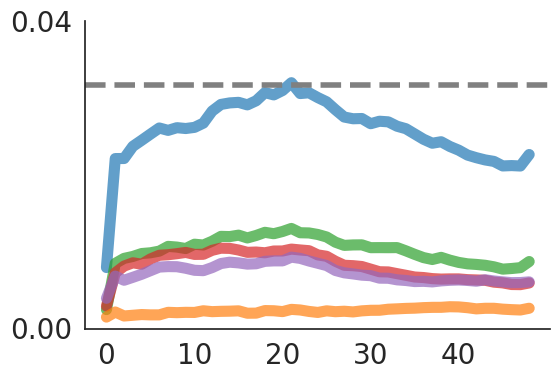

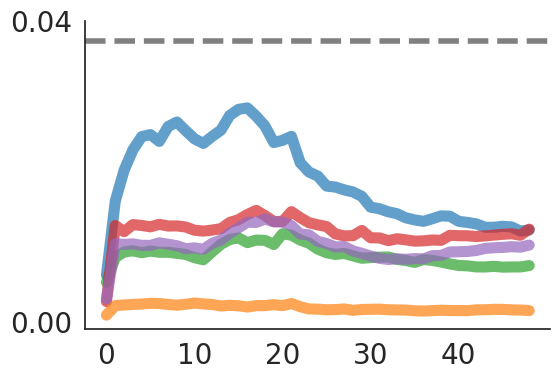

In [148]:
# plot last token results 
if model_name == 'gpt2-xl':
    model_names = ['gpt2-xl' for i in range(N)]

    gpt2_sp_384_max = np.max(res_pd_384.loc[res_pd_384.Network=='language'].r2.values)
    gpt2_sp_243_max = np.max(res_pd_243.loc[res_pd_243.Network=='language'].r2.values)

    _ = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                                layer_name_arr=layer_name_arr, saveName='gpt2-xl_lt_perf_across_layers_384', 
                                figurePath=figurePath, resultsFolder=resultsFolder, yticks=[0, .04], exp='384', 
                                model_nums=model_nums,
                                networks=networks, br_labels=br_labels_dict['384'], 
                                subjects=subjects_dict['384'], colors=colors, plot_legend=False, gpt_sp_perf=gpt2_sp_384_max, ylabel=False, xlabel=False)
    _ = plot_test_perf_across_layers(model_names, dataset='pereira', layers_range=layers_range,
                                layer_name_arr=layer_name_arr, saveName='gpt2-xl_lt_perf_across_layers_243', 
                                figurePath=figurePath, resultsFolder=resultsFolder, yticks=[0, 0.04], exp='243', 
                                model_nums=model_nums,ylabel=False, xlabel=False, 
                                networks=networks, br_labels=br_labels_dict['243'], 
                                subjects=subjects_dict['243'], colors=colors, plot_legend=False, gpt_sp_perf=gpt2_sp_243_max)

## Figure 3a, 3b

In [9]:
# load r2 values for all 64 models, as well as model names
if model_name == 'gpt2-xl':
    if glove_version and deref_version:
        all_models_results_384 = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained_glove.npy")
        all_models_results_243 = np.load("/data/LLMs/Pereira/trained_results/r2_243_trained_glove.npy")
    elif glove_version:
        print("GLOVE NO DEREF")
        all_models_results_384 = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained_glove-noderef.npy")
        all_models_results_243 = np.load("/data/LLMs/Pereira/trained_results/r2_243_trained_glove-noderef.npy")
    else:
        all_models_results_384 = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained.npy")
        all_models_results_243 = np.load("/data/LLMs/Pereira/trained_results/r2_243_trained.npy")
    model_names = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained_model_names.npy")
if model_name == 'ROB':
    all_models_results_384 = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained_rob.npy")
    all_models_results_243 = np.load("/data/LLMs/Pereira/trained_results/r2_243_trained_rob.npy")
    model_names = np.load("/data/LLMs/Pereira/trained_results/r2_384_trained_rob_model_names.npy")

GLOVE NO DEREF


### Find best sub-model which includes a given feature, in order of complexity

In [10]:
lang_voxels_384 = np.argwhere(br_labels_dict['384']=='language').squeeze() # avg performance (after clipping) in language (lang)
# store in pd df
model_r2_384 = pd.DataFrame({'model_name': model_names, 'r2_vals': np.nanmean(np.clip(all_models_results_384[:, lang_voxels_384], 0, np.inf), axis=1)})

# same for 243
lang_voxels_243 = np.argwhere(br_labels_dict['243']=='language').squeeze()
model_r2_243 = pd.DataFrame({'model_name': model_names, 'r2_vals': np.nanmean(np.clip(all_models_results_243[:, lang_voxels_243], 0, np.inf), axis=1)})

# find that best sub-model for each combination of feature space
# each time adding a more complex feature 
# the function find_best finds the best submodel across all voxels, and
# returns a string which is the name of the best submodel
POS_SL_384 = find_best(model_r2_384, '', ['WORD', 'SENSE', 'SYNT', model_name_upper])
word_384 = find_best(model_r2_384, 'WORD', ['SENSE', 'SYNT', model_name_upper])
sense_384 = find_best(model_r2_384, 'SENSE', ['SYNT', model_name_upper])
synt_384 = find_best(model_r2_384, 'SYNT', [model_name_upper])
GPT2_384 = find_best(model_r2_384, model_name_upper, [])


POS_SL_243 = find_best(model_r2_243, '', ['WORD', 'SENSE', 'SYNT', model_name_upper])
word_243 = find_best(model_r2_243, 'WORD', ['SENSE', 'SYNT', model_name_upper])
sense_243 = find_best(model_r2_243, 'SENSE', ['SYNT', model_name_upper])
synt_243 = find_best(model_r2_243, 'SYNT', [model_name_upper])
GPT2_243 = find_best(model_r2_243, model_name_upper, [])

# store best submodel names into a list
best_models_384 = [model_name_upper, POS_SL_384, word_384, sense_384, synt_384, GPT2_384]
best_models_243 = [model_name_upper, POS_SL_243, word_243, sense_243, synt_243, GPT2_243]

# get index of submodels from the model_names array
best_idxs_384 = [np.argwhere(model_names==x)[0][0] for x in best_models_384]
best_idxs_243 = [np.argwhere(model_names==x)[0][0] for x in best_models_243]

# use these indices to select the best r2
r2_best_384 = all_models_results_384[best_idxs_384]
r2_best_243 = all_models_results_243[best_idxs_243]

# for the figure, we'll just use the name of the full model because submodels differ across experiments
ordered_submodels = [model_name_upper, 'SP+SL', 'SP+SL+WORD', 'SP+SL+WORD+SENSE', 'SP+SL+WORD+SENSE+SYNT', f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}']

# create a pd containing the best models that we found
r2_stacked_pd_384 = create_pd_selected_models(all_models_results_384, model_names, best_models_384, ordered_submodels, num_vox_dict, br_labels_dict, subjects_dict, '384')
r2_stacked_pd_243 = create_pd_selected_models(all_models_results_243, model_names, best_models_243, ordered_submodels, num_vox_dict, br_labels_dict, subjects_dict, '243')
network_order=['language', 'DMN', 'MD', 'visual']

# 384 has some nan indices b/c some voxels have constant activations across sentences
non_nan_384 = find_rows_without_nan(np.vstack((r2_best_384))) 


<Figure size 640x480 with 0 Axes>

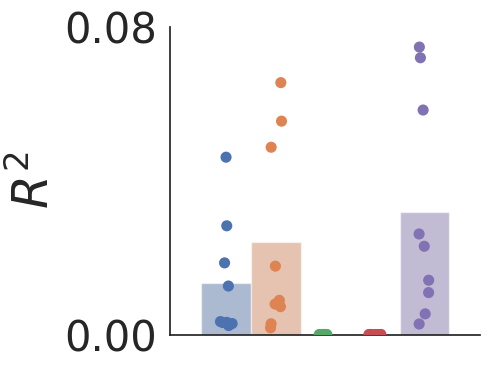

In [31]:
subj_avg_pd_384, _, _ = plot_across_subjects(r2_stacked_pd_384.copy(), figurePath=figurePath, saveName='scratch', 
                                             hue_order=ordered_submodels[1:], yticks=[0, 0.08], 
                               draw_lines=False, selected_networks=['language'], order=['language'], plot_legend=False,  LLM_perf=None, 
                               width=0.8, ms=8)

<Figure size 640x480 with 0 Axes>

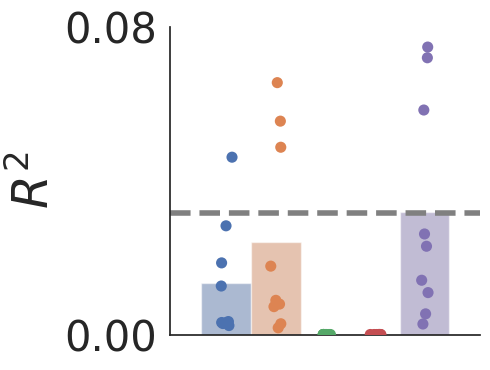

In [32]:
# now plot with the mean 
LLM_mean_384 = subj_avg_pd_384.groupby(['Model']).r2.mean()[0]
subj_avg_pd_384, _, _ = plot_across_subjects(r2_stacked_pd_384.copy(), figurePath=figurePath, saveName=f'384_across_subjects_{model_name}', 
                                             hue_order=ordered_submodels[1:], yticks=[0, 0.08], 
                               draw_lines=False, selected_networks=['language'], order=['language'], plot_legend=False,  LLM_perf=LLM_mean_384, 
                               ms=8)
subj_avg_pd_384 = subj_avg_pd_384.reset_index()

<Figure size 640x480 with 0 Axes>

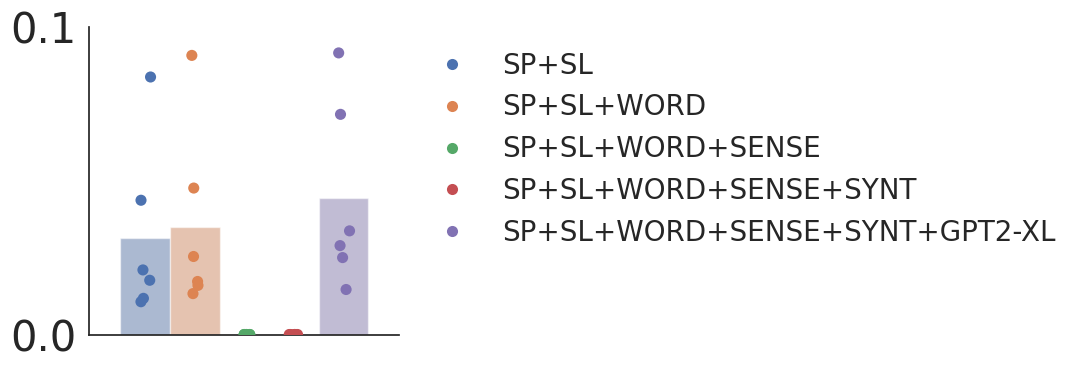

In [33]:
subj_avg_pd_243, _, _ = plot_across_subjects(r2_stacked_pd_243.copy(), figurePath=figurePath, 
                                             saveName='scratch', hue_order=ordered_submodels[1:], yticks=[0, 0.10], 
                               draw_lines=False, selected_networks=['language'], order=['language'],
                               plot_legend=True, LLM_perf=None, ylabel=False, width=0.8, ms=8)

<Figure size 640x480 with 0 Axes>

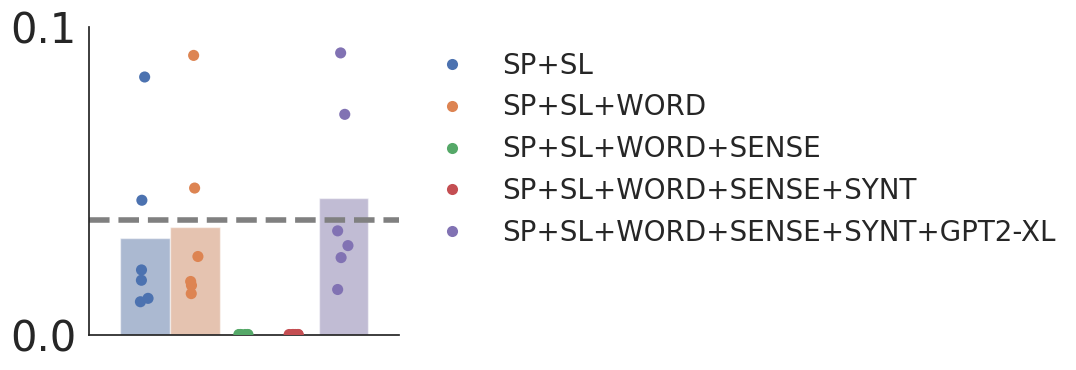

In [34]:
LLM_mean_243 = subj_avg_pd_243.groupby(['Model']).r2.mean()[0]
subj_avg_pd_243, _, _ = plot_across_subjects(r2_stacked_pd_243.copy(), figurePath=figurePath, 
                                             saveName=f'243_across_subjects_{model_name}', hue_order=ordered_submodels[1:], yticks=[0, 0.10], 
                               draw_lines=False, selected_networks=['language'], order=['language'],
                               plot_legend=True, LLM_perf=LLM_mean_243, ylabel=False, ms=8)
subj_avg_pd_243 = subj_avg_pd_243.reset_index()

#### Table 2

In [35]:
subj_avg_pd_384.groupby(['Model']).r2.mean()

Model
GPT2-XL                          0.031517
SP+SL                            0.013364
SP+SL+WORD                       0.023974
SP+SL+WORD+SENSE                 0.000000
SP+SL+WORD+SENSE+SYNT            0.000000
SP+SL+WORD+SENSE+SYNT+GPT2-XL    0.031883
Name: r2, dtype: float64

In [36]:
subj_avg_pd_243.groupby(['Model']).r2.mean()

Model
GPT2-XL                          0.037133
SP+SL                            0.031357
SP+SL+WORD                       0.034989
SP+SL+WORD+SENSE                 0.000000
SP+SL+WORD+SENSE+SYNT            0.000000
SP+SL+WORD+SENSE+SYNT+GPT2-XL    0.044167
Name: r2, dtype: float64

In [37]:
sp_sl_word_perf_subj_384 = subj_avg_pd_384.loc[subj_avg_pd_384.Model=='SP+SL+WORD'].groupby(['subjects']).r2.mean().values
sp_sl_word_perf_subj_243 = subj_avg_pd_243.loc[subj_avg_pd_243.Model=='SP+SL+WORD'].groupby(['subjects']).r2.mean().values
sp_sl_word_sense_syntax_perf_subj_384 = subj_avg_pd_384.loc[subj_avg_pd_384.Model=='SP+SL+WORD+SENSE+SYNT'].groupby(['subjects']).r2.mean().values
sp_sl_word_sense_syntax_perf_subj_243 = subj_avg_pd_243.loc[subj_avg_pd_243.Model=='SP+SL+WORD+SENSE+SYNT'].groupby(['subjects']).r2.mean().values
LLM_perf_subj_384 = subj_avg_pd_384.loc[subj_avg_pd_384.Model==model_name_upper].groupby(['subjects']).r2.mean().values
LLM_perf_subj_243 = subj_avg_pd_243.loc[subj_avg_pd_243.Model==model_name_upper].groupby(['subjects']).r2.mean().values
full_perf_subj_384 = subj_avg_pd_384.loc[subj_avg_pd_384.Model==f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}'].groupby(['subjects']).r2.mean().values
full_perf_subj_243 = subj_avg_pd_243.loc[subj_avg_pd_243.Model==f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}'].groupby(['subjects']).r2.mean().values

In [24]:
def compare_perf(model1, model2):
    
    frac_perf = model1/model2
    mean_across_subjs = np.mean(frac_perf)
    sem_across_subjs = np.std(frac_perf)/np.sqrt(model1.shape[0]) 
    #print(frac_perf)
    return mean_across_subjs, sem_across_subjs

In [18]:
m, s = compare_perf(sp_sl_word_perf_subj_384, LLM_perf_subj_384)
print(m,s)
m, s = compare_perf(sp_sl_word_perf_subj_243, LLM_perf_subj_243)
print(m,s)
m, s = compare_perf(sp_sl_word_sense_syntax_perf_subj_384, LLM_perf_subj_384)
print(m,s)
m, s = compare_perf(sp_sl_word_sense_syntax_perf_subj_243, LLM_perf_subj_243)
print(m,s)
m, s = compare_perf(sp_sl_word_sense_syntax_perf_subj_384, full_perf_subj_384)
print(m,s)
m, s = compare_perf(sp_sl_word_sense_syntax_perf_subj_243, full_perf_subj_243)
print(m,s)

0.7924037624295177 0.09912929923461393
3.271422336904461 2.0666117764252743
0.9089518089647662 0.11067972253197729
3.3656025867248354 2.01347185238779
0.8298430551630391 0.09600708204376357
0.9368390294129793 0.034750308611454485


In [19]:
(subj_avg_pd_384.groupby(['Model']).r2.mean().values + subj_avg_pd_243.groupby(['Model']).r2.mean().values)/2

array([0.03379888, 0.02236426, 0.03218169, 0.03278125, 0.03459438,
       0.03862972])

In [20]:
best_DEM_model_384 = 'SL+WORD+SENSE+SYNT'
best_DEM_model_243 = 'SL+WORD+SYNT'
best_LLM_model_384 = f'SL+{model_name_upper}'
best_LLM_model_243 = f'SL+WORD+SYNT+{model_name_upper}'

0.938**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:492: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', alpha=0.75, color='black')


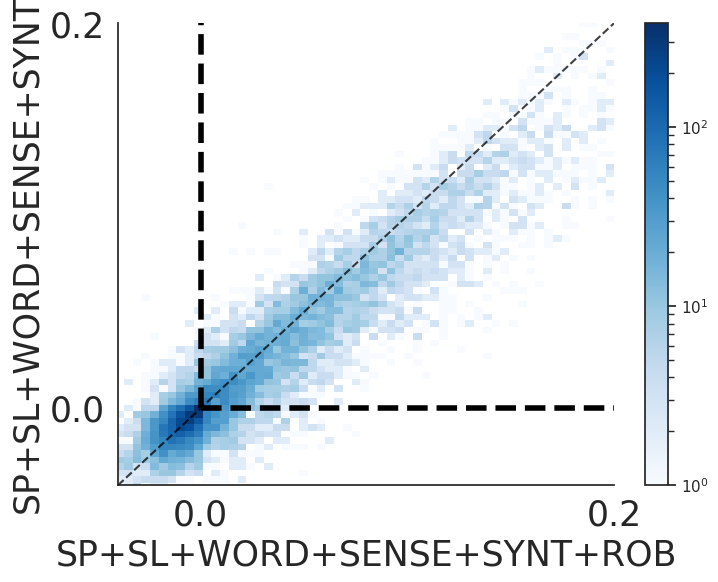

0.907**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:492: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', alpha=0.75, color='black')


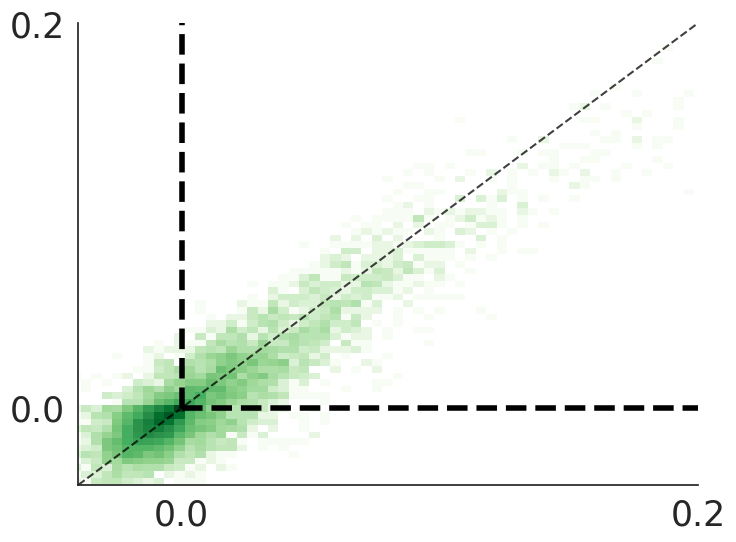

0.892**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:492: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', alpha=0.75, color='black')


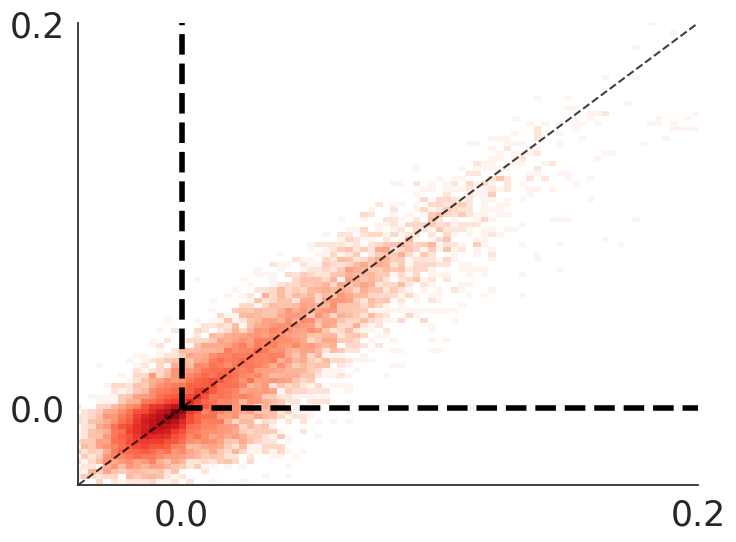

0.901**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:492: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax.get_xlim(), ax.get_ylim(), 'r--', alpha=0.75, color='black')


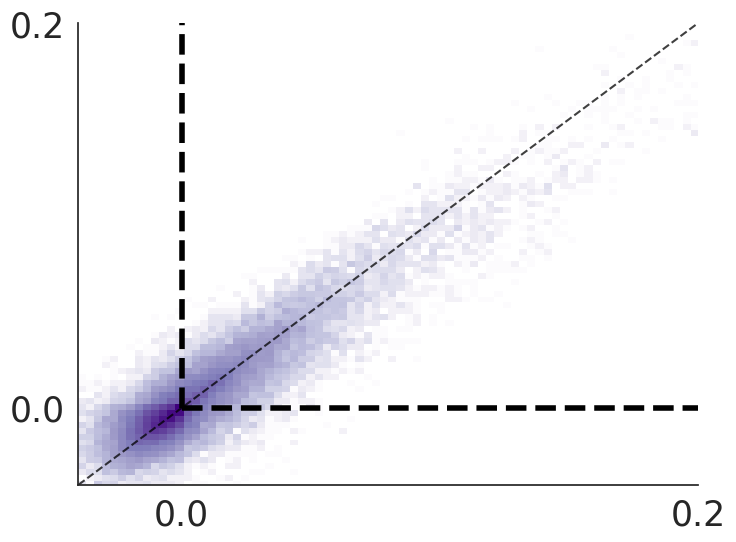

In [21]:
pass_info_plot_hist2d(max_val_dict={'language': 0.2, 'DMN': 0.2, 'MD':0.2, 'visual': 0.2}, min_val=-0.04, df=r2_stacked_pd_384, best_DEM_model='SP+SL+WORD+SENSE+SYNT', 
                      best_LLM_model=f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}', 
                      figurePath=figurePath, saveName=f'scatter_384_{model_name}')

0.981**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:494: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  


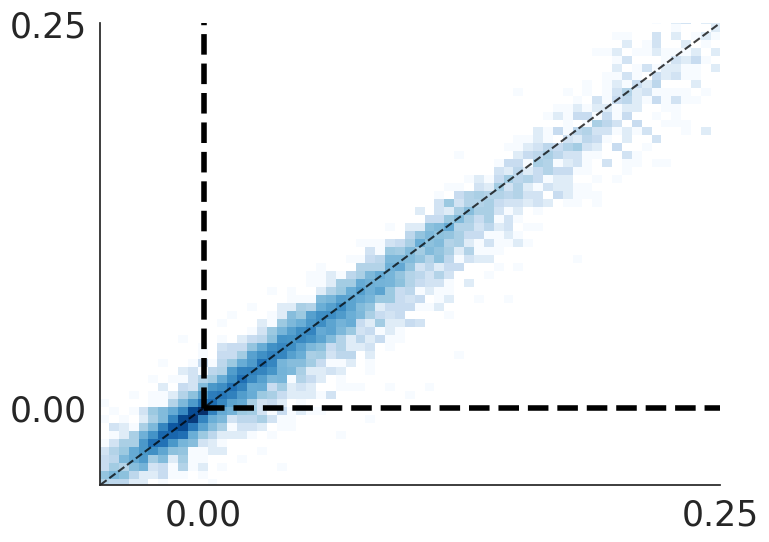

0.959**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:494: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  


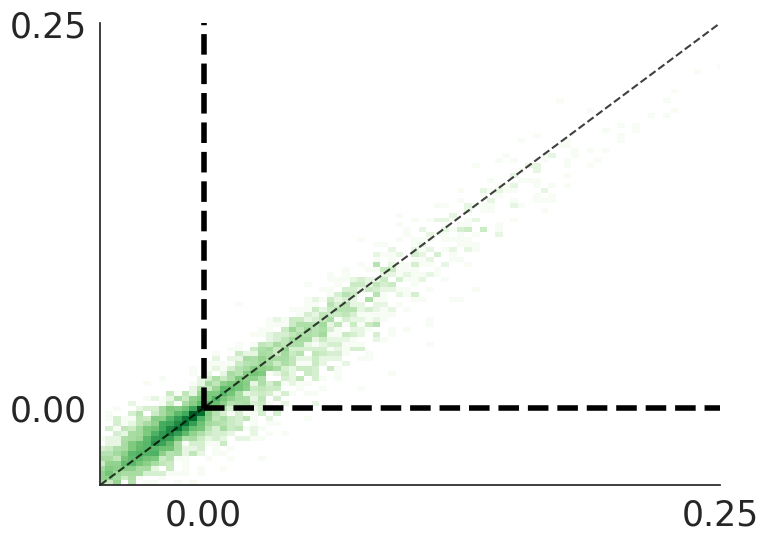

0.966**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:494: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  


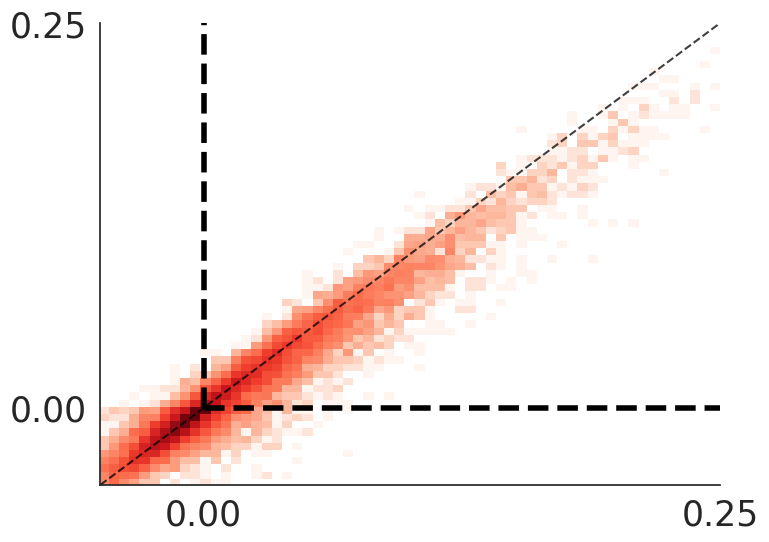

0.961**
FLIPPED


/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/plotting_functions.py:494: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  


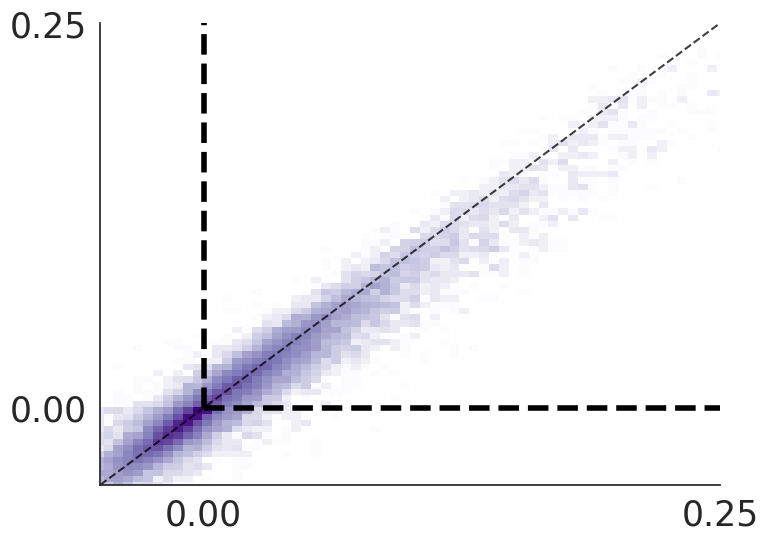

In [45]:
pass_info_plot_hist2d(max_val_dict={'language': 0.25, 'DMN': 0.25, 'MD':0.25, 'visual': 0.25}, min_val=-0.05, df=r2_stacked_pd_243, best_DEM_model='SP+SL+WORD+SENSE+SYNT',
                      best_LLM_model=f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}', 
                      figurePath=figurePath, saveName=f'scatter_243_{model_name}', labels=False)

In [38]:
def return_frac_var_explained(submodel, submodel_with_LLM, LLM_perf):
    
    submodel = submodel.loc[submodel.Network=='language']
    submodel_with_LLM = submodel_with_LLM.loc[submodel_with_LLM.Network=='language']
    numerator = submodel_with_LLM.groupby(['subjects']).r2.mean().values - submodel.groupby(['subjects']).r2.mean().values
    
    fve = np.clip(1 - (numerator/LLM_perf), 0, 1)
    print(np.mean(fve), np.std(fve)/np.sqrt(LLM_perf.shape[0]))
    return fve
    

In [39]:
all_models_results_384_clipped = np.clip(all_models_results_384, 0, np.inf)
all_models_results_243_clipped = np.clip(all_models_results_243, 0, np.inf)

# Voxel-wise corrections (Figure 3c, d) and Table 3

In [17]:
# performs voxel wise max correction after selecting a set of feature spaces 
# max_across_selected_models prints the average r2, after clipping, in lang network
SP_SL_vc_384 = max_across_selected_models(all_models_results_384_clipped, model_names, ['WORD', 'SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name='SP+SL')
SP_SL_LLM_vc_384 = max_across_selected_models(all_models_results_384_clipped, model_names, ['WORD', 'SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'SP+SL+{model_name_upper}')

SP_SL_vc_243 = max_across_selected_models(all_models_results_243_clipped, model_names, ['WORD', 'SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name='SP+SL')
SP_SL_LLM_vc_243 = max_across_selected_models(all_models_results_243_clipped, model_names, ['WORD', 'SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'SP+SL+{model_name_upper}')

0.014730835410081055
0.03395847831686677
0.03333820637542375
0.04783238560719399


In [20]:
fve_384_sp_sl = return_frac_var_explained(SP_SL_vc_384, SP_SL_LLM_vc_384, LLM_perf_subj_384)
fve_243_sp_sl = return_frac_var_explained(SP_SL_vc_243, SP_SL_LLM_vc_243, LLM_perf_subj_243)


0.39008369969153484 0.07774013541151942
0.605063285743349 0.10293918317270254


In [12]:
SP_SL_word_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name='SP+SL+WORD')
SP_SL_word_LLM_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'SP+SL+WORD+{model_name_upper}')

SP_SL_word_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name='SP+SL+WORD')
SP_SL_word_LLM_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'SP+SL+WORD+{model_name_upper}')


0.027839392238853174
0.035157523475434216
0.04384561050831086
0.04946458992167394


In [41]:
fve_384_sp_sl_word = return_frac_var_explained(SP_SL_word_vc_384, SP_SL_word_LLM_vc_384, LLM_perf_subj_384)
fve_243_sp_sl_word = return_frac_var_explained(SP_SL_word_vc_243, SP_SL_word_LLM_vc_243, LLM_perf_subj_243)

0.8483462440538432 0.04950443546796631
0.8954473339181699 0.03872639417520716


In [69]:
SP_SL_word_sense_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name='SP+SL+WORD+SENSE')
SP_SL_word_sense_LLM_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'SP+SL+WORD+SENSE+{model_name_upper}')

SP_SL_word_sense_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name='SP+SL+WORD+SENSE')
SP_SL_word_sense_LLM_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'SP+SL+WORD+SENSE+{model_name_upper}')


0.032425342560926766
0.037689214614524104
0.05084975458152823
0.054827133145240584


In [70]:
fve_384_sp_sl_word_sense = return_frac_var_explained(SP_SL_word_sense_vc_384, SP_SL_word_sense_LLM_vc_384, LLM_perf_subj_384)
fve_243_sp_sl_word_sense = return_frac_var_explained(SP_SL_word_sense_vc_243, SP_SL_word_sense_LLM_vc_243, LLM_perf_subj_243)

0.8447578387844106 0.049246787061946184
0.9157981567739536 0.02994365004943463


In [71]:
SP_SL_word_sense_synt_vc_384 = max_across_selected_models(all_models_results_384, model_names, [model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name='SP+SL+WORD+SENSE+SYNT')
SP_SL_word_sense_synt_LLM_vc_384 = max_across_selected_models(all_models_results_384, model_names, [], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}')

SP_SL_word_sense_synt_vc_243 = max_across_selected_models(all_models_results_243, model_names, [model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name='SP+SL+WORD+SENSE+SYNT')
SP_SL_word_sense_synt_LLM_vc_243 = max_across_selected_models(all_models_results_243, model_names, [], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'SP+SL+WORD+SENSE+SYNT+{model_name_upper}')

0.03538926918684363
0.03881585339182158
0.05764739412695769
0.057905749495825776


In [73]:
fve_384_sp_sl_word_sense_synt = return_frac_var_explained(SP_SL_word_sense_synt_vc_384, SP_SL_word_sense_synt_LLM_vc_384, LLM_perf_subj_384)
fve_243_sp_sl_word_sense_synt = return_frac_var_explained(SP_SL_word_sense_synt_vc_243, SP_SL_word_sense_synt_LLM_vc_243, LLM_perf_subj_243)

0.8837801696856119 0.04759880874532028
0.9739526814073244 0.019000985543738483


In [32]:
modified_384 = pd.concat((SP_SL_word_vc_384, SP_SL_word_LLM_vc_384))
modified_243 = pd.concat((SP_SL_word_vc_243, SP_SL_word_LLM_vc_243))

In [33]:
default_palette = sns.color_palette('deep')

In [13]:
_, _, _ = plot_across_subjects(modified_384.copy(), figurePath=figurePath, selected_networks=['language'],
                                             saveName=f'384_across_subjects_{model_name}_mod', hue_order=['SP+SL+WORD', f'SP+SL+WORD+{model_name_upper}'], 
                                             yticks=[0,0.08], order=['language'], clip_zero=True, color_palette=[default_palette[1], default_palette[9]], 
                                             draw_lines=True, ms=12, plot_legend=False, 
                                             plot_legend_under=False, width=0.67, figsize=[3,4.5])

NameError: name 'modified_384' is not defined

<Figure size 640x480 with 0 Axes>

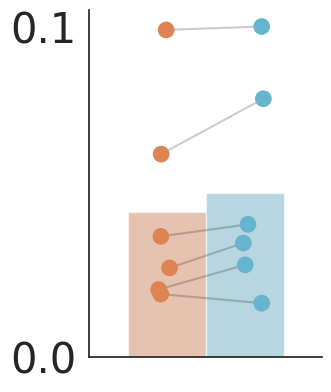

In [35]:
_, _, _ = plot_across_subjects(modified_243.copy(), figurePath=figurePath, selected_networks=['language'],
                                             saveName=f'243_across_subjects_{model_name}_mod', hue_order=['SP+SL+WORD', f'SP+SL+WORD+{model_name_upper}'], 
                                             yticks=[0,0.10], order=['language'], clip_zero=True, color_palette=[default_palette[1], default_palette[9]], draw_lines=True, ms=12, 
                                             plot_legend=False, plot_legend_under=True, ylabel=False, width=0.67, figsize=[3,4.5])

In [11]:
SP_SL_word_vc_243['r2'].values.shape

NameError: name 'SP_SL_word_vc_243' is not defined

In [20]:
plotting_folder = "/data/LLMs/Pereira/plotting_data/"
subjects, stored_data_exp_WN_pos = save_fMRI_simple(SP_SL_word_vc_243.r2.values, exp='243', 
                        subjects_to_plot=np.unique(subjects_dict['243']), 
                        subjects_all=subjects_dict['243'], save_name=f'SP+SL+WORD_243_{model_name}') 

subjects, stored_data_exp_WN_pos = save_fMRI_simple(SP_SL_word_LLM_vc_243.r2.values, exp='243', 
                        subjects_to_plot=np.unique(subjects_dict['243']), 
                        subjects_all=subjects_dict['243'], save_name=f'FULL_243_{model_name}')

plotting.plot_glass_brain(f'{plotting_folder}SP+SL+WORD_243_{model_name}_426.nii', 
                            colorbar=False, display_mode='xz', vmax=0.4, output_file=f'{figurePath}glass_brain_SP+SL+WORD_243_426_{model_name}.pdf')
plotting.plot_glass_brain(f'{plotting_folder}FULL_243_{model_name}_426.nii', 
                            colorbar=True, display_mode='xz', vmax=0.4, output_file=f'{figurePath}glass_brain_FULL_243_426_{model_name}.pdf')

/home2/ebrahim/miniconda3/envs/llm_brain/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:1471: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/home2/ebrahim/miniconda3/envs/llm_brain/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:1471: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),


In [21]:
plotting_folder = "/data/LLMs/Pereira/plotting_data/"
subjects, stored_data_exp_WN_pos = save_fMRI_simple(SP_SL_word_vc_384.r2.values, exp='384', 
                        subjects_to_plot=np.unique(subjects_dict['384']), 
                        subjects_all=subjects_dict['384'][non_nan_384], save_name=f'SP+SL+WORD_384_{model_name}') 

subjects, stored_data_exp_WN_pos = save_fMRI_simple(SP_SL_word_LLM_vc_384.r2.values, exp='384', 
                        subjects_to_plot=np.unique(subjects_dict['384']), 
                        subjects_all=subjects_dict['384'][non_nan_384], save_name=f'FULL_384_{model_name}')

plotting.plot_glass_brain(f'{plotting_folder}SP+SL+WORD_384_{model_name}_426.nii', 
                            colorbar=False, display_mode='xz', vmax=0.35, output_file=f'{figurePath}glass_brain_SP+SL+WORD_384_426_{model_name}.pdf')
plotting.plot_glass_brain(f'{plotting_folder}FULL_384_{model_name}_426.nii', 
                            colorbar=True, display_mode='xz', vmax=0.35, output_file=f'{figurePath}glass_brain_FULL_384_426_{model_name}.pdf')

/home2/ebrahim/miniconda3/envs/llm_brain/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:1471: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/home2/ebrahim/miniconda3/envs/llm_brain/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:1471: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),


In [19]:
figurePath

'/home3/ebrahim/what-is-brainscore/analyze_results/figures_code/figures/pereira_trained_obi/glove-noderef/'